In [1]:
#importing libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer
data= load_breast_cancer()
df = pd.DataFrame(data.data, columns = data.feature_names)
X= data.data
Y= data.target

#569 rows × 31 columns


In [2]:
df['target']= data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


<AxesSubplot: >

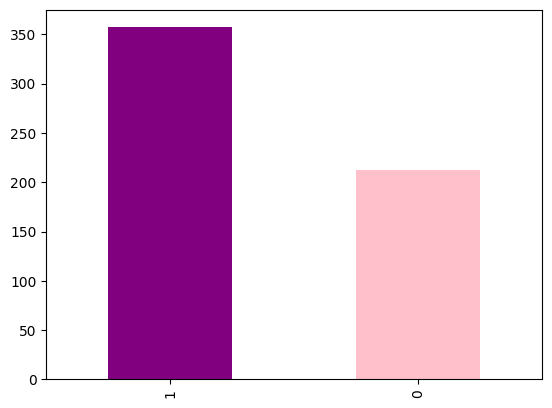

In [3]:
df['target'].value_counts().plot(kind= 'bar', color= ['purple', 'pink'])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= .33, 
                                                   random_state= 77)

In [5]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models= []
models.append(('LoR', LogisticRegression(solver='newton-cg', max_iter= 1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('K-nn',KNeighborsClassifier(n_neighbors=7)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC(gamma= 'auto')))

#evaluate each model 
results= []
names= []
scoring= 'accuracy'
for name, model in models:
    kfold= KFold(n_splits=9, random_state=19, shuffle= True)
    cv_results= cross_val_score(model, X_train, Y_train, cv= kfold, scoring=scoring)
    results.append(cv_results)
    names.append(names)
    print(f'{name}: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)')

LoR: 94.75% (2.45%)
LDA: 96.07% (3.83%)
K-nn: 91.60% (3.54%)
CART: 93.71% (3.29%)
GNB: 93.98% (2.93%)
SVC: 61.97% (5.86%)


              precision    recall  f1-score   support

           0       0.95      0.91      0.93        67
           1       0.95      0.98      0.96       121

    accuracy                           0.95       188
   macro avg       0.95      0.94      0.95       188
weighted avg       0.95      0.95      0.95       188

LoR: 94.91% (2.66%)
------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.90      0.94        67
           1       0.95      1.00      0.97       121

    accuracy                           0.96       188
   macro avg       0.97      0.95      0.96       188
weighted avg       0.96      0.96      0.96       188

LDA: 95.80% (2.65%)
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        67
           1       0.94      0.98      0.96       121

    accuracy                    

c:\Users\alexg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alexg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alexg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        67
           1       0.64      1.00      0.78       121

    accuracy                           0.64       188
   macro avg       0.32      0.50      0.39       188
weighted avg       0.41      0.64      0.50       188

SVC: 62.76% (7.09%)
------------------------------------------------------


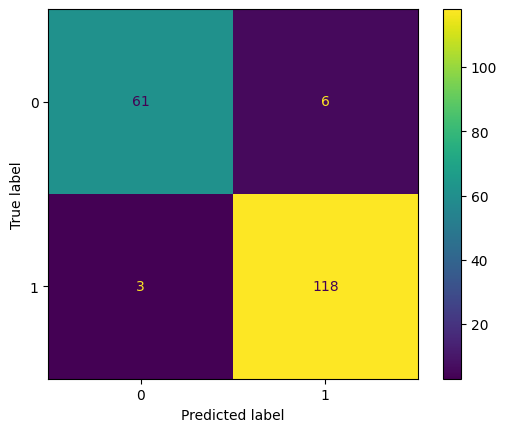

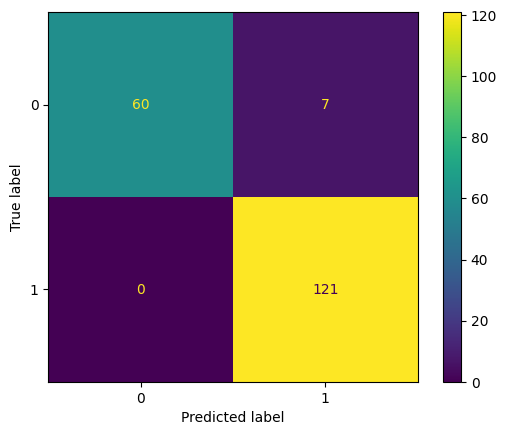

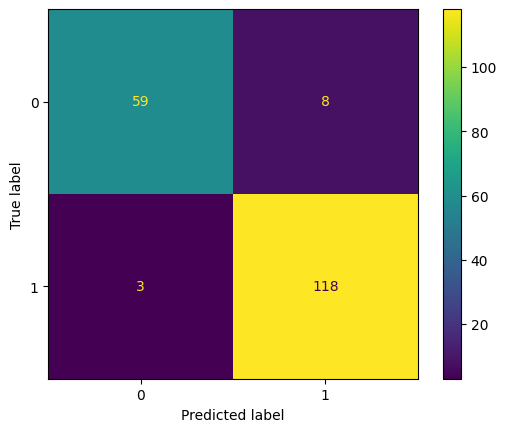

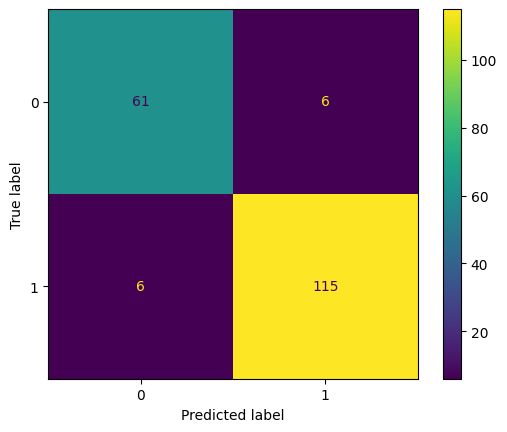

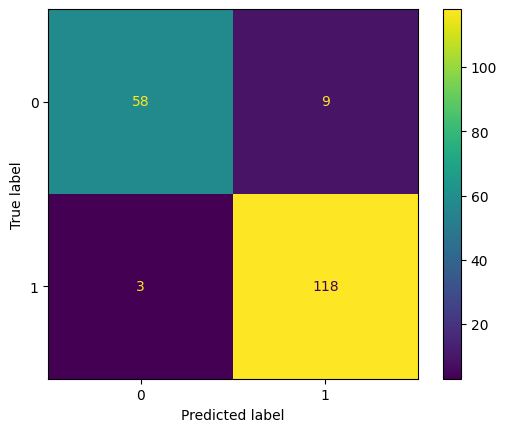

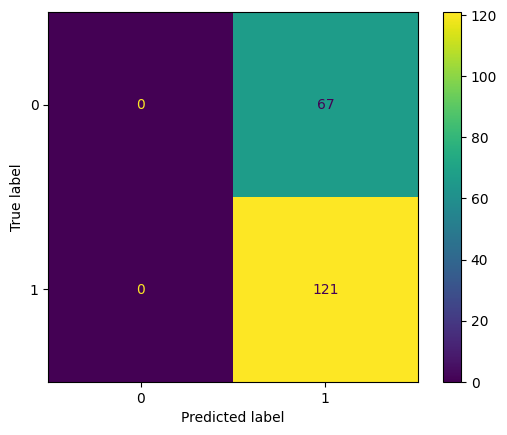

In [6]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
models= []
models.append(('LoR', LogisticRegression(solver='newton-cg', max_iter= 1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('K-NN',KNeighborsClassifier(n_neighbors=7)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC(gamma= 'auto')))

#evaluate each model 
results= []
names= []
scoring= 'accuracy'
for name, model in models:
    kfold= KFold(n_splits=9, random_state=19, shuffle= True)
    cv_results= cross_val_score(model, X, Y, cv= kfold, scoring=scoring)
    model.fit(X_train, Y_train)
    Y_pred= model.predict(X_test)
    report= classification_report(Y_test, Y_pred)
    cf= confusion_matrix(Y_test, Y_pred)
    cm_display= ConfusionMatrixDisplay(cf).plot()
    results.append(cv_results)
    names.append(names)
    print(report)
    print(f'{name}: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)')
    print('-'*54)

In [7]:
from sklearn.metrics import classification_report

LoR: 94.91% (2.66%)
------------------------------------------------------
LDA: 95.80% (2.65%)
------------------------------------------------------
K-NN: 93.32% (3.54%)
------------------------------------------------------
CART: 92.09% (4.10%)
------------------------------------------------------
GNB: 93.33% (2.04%)
------------------------------------------------------
SVC: 62.76% (7.09%)
------------------------------------------------------


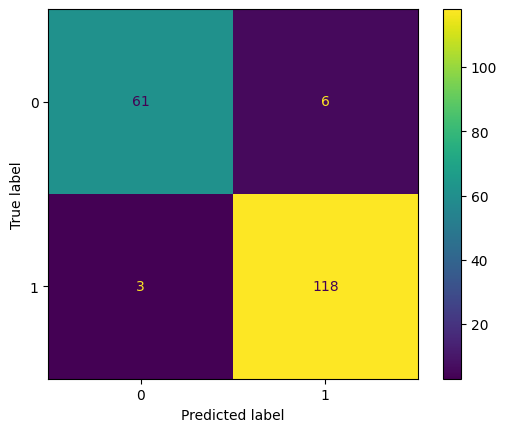

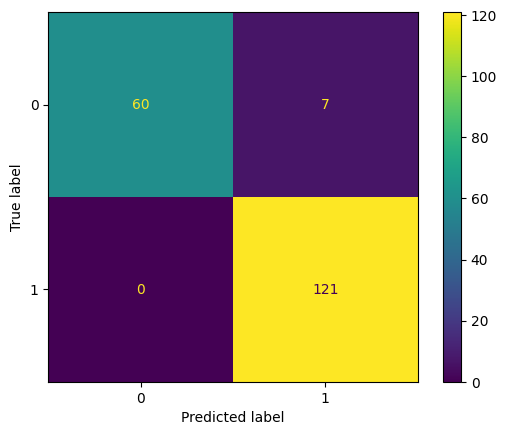

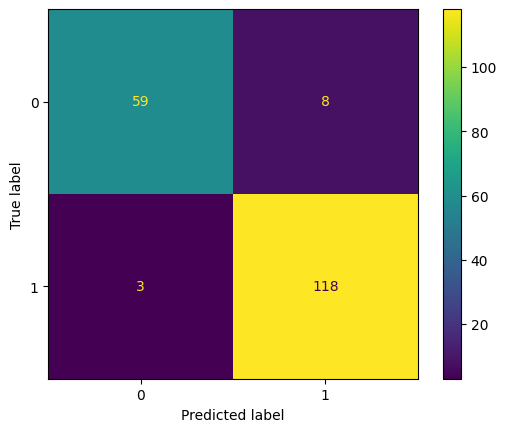

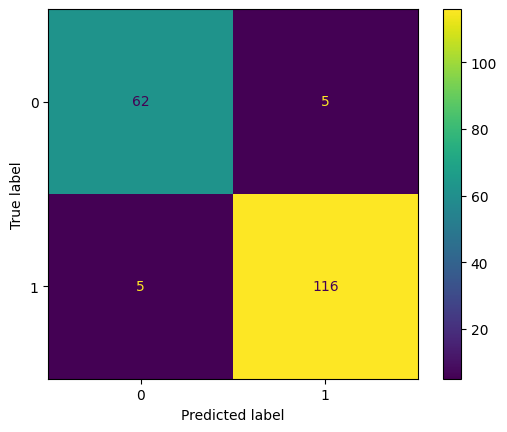

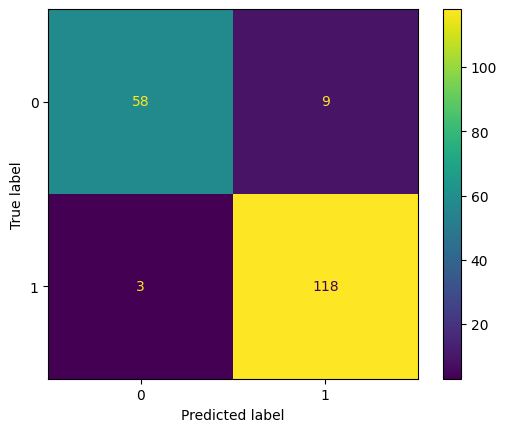

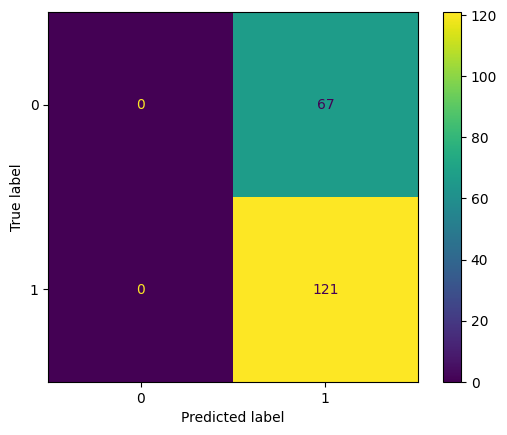

In [8]:
for name, model in models:
    kfold= KFold(n_splits=9, random_state=19, shuffle= True)
    cv_results= cross_val_score(model, X, Y, cv= kfold, scoring=scoring)
    model.fit(X_train, Y_train)
    Y_pred= model.predict(X_test)
    cf= confusion_matrix(Y_test, Y_pred)
    cm_display= ConfusionMatrixDisplay(cf).plot()
    results.append(cv_results)
    names.append(names)
    print(f'{name}: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)')
    print('-'*54)